## Support Vector Machines
In this notebook, we will implement support vector machines from scratch using SGD(Stochastic Gradient Descent).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
class SVM:
    def __init__(self,learning_rate=.01,alpha=.01,epoch=100):
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.epoch = epoch
        self.error_log = {'loss':[],'missclassify':[],'epoch':[]}
    
    def predict(self,X):
        y_pred = np.dot(X,self.w) + self.b
        return np.sign(y_pred)
    
    def cost(self,y,pred_val):
        # hinge loss + l2 regularization
        hinge_loss = np.mean(max(0,1-y*(pred_val)))
        l2_reg = np.dot(self.w,self.w)*1/2
        loss = hinge_loss + l2_reg
        return loss
    
    def gradient_descent(self,x,y,pred_val):
        
        if y*pred_val>=1:
            dw = self.learning_rate*(self.alpha*(self.w))
            db = 0
        else:
            dw = self.learning_rate*(self.alpha*self.w - y*x)
            db = self.learning_rate*y
        
        return dw,db
            
    def fit(self,X,y):
        self.m,self.n = X.shape[0],X.shape[1]
        self.w = np.zeros((self.n))
        self.b =0
        
        for i in range(1,self.epoch+1):
            errors = 0
            tot_loss = 0
            for x_sample,y_sample in zip(X,y):
                pred_val= np.dot(x_sample,self.w)+self.b
                loss = self.cost(y_sample,pred_val)
                tot_loss = tot_loss + loss
                dw,db = self.gradient_descent(x_sample,y_sample,pred_val)
                self.w = self.w - dw
                self.db =self.b - db
                if pred_val*y_sample<1:
                    errors =errors+1
            
            self.error_log['missclassify'].append(errors)
            self.error_log['epoch'].append(i)
            self.error_log['loss'].append(tot_loss/X.shape[0])
            
        return self.w,self.b
            

In [3]:
random_seed = 21
X, y = make_blobs(n_samples=1000, centers=2,random_state=random_seed)
# X,y = make_classification(n_samples=1000,n_clusters_per_class=1, class_sep=2,n_features=2,n_informative=2,n_redundant=0,random_state=random_seed)
y[y==0]=-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_seed)

In [4]:
svm = SVM(epoch=200)
w,b = svm.fit(X_train,y_train)

In [5]:
w,b

(array([ 0.27142629, -0.08366217]), 0)

In [6]:
y_pred = svm.predict(X_test)
print("Accuracy: ", np.mean(y_test==y_pred))

Accuracy:  1.0


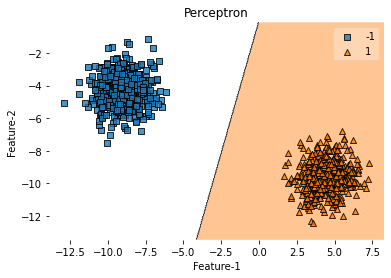

In [7]:
plot_decision_regions(X, y, clf=svm)
plt.title('Perceptron')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.show()